In [2]:
# This cell installs VESICal. You can comment out with a #
!pip install VESIcal

  Using cached VESIcal-0.9.12-py3-none-any.whl (111 kB)


In [3]:
import VESIcal as v

In [4]:
# Importing matplotlib (python's plotting thing), pandas (pythons nice table formats) and numpy (python paths)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Load in melt inclusion data
myfile= v.ExcelFile('Cassidy2015_AndesiteMI_YouTubeDemo.xlsx', sheet_name='Sheet1',  input_type='wtpercent')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Allows you to inspect data, and check VESIcal has read column headings correctly (e.g., non zero values for oxides)
myfile.get_data()

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,H2O,CO2,Cr2O3,NiO,CoO,P2O5,Phase,Temp
SSH4_1,64.6,0.86,16.4,0.663327,3.3830,0.0,0.87,4.53,4.08,1.05,5.06,0.0105,0.0,0.0,0.0,0.0,Pyx,1050
SSH4_2,63.6,0.59,16.5,0.573328,2.9240,0.0,0.78,4.24,4.31,0.97,5.08,0.0071,0.0,0.0,0.0,0.0,Pyx,1050
SSH10_1,58.7,0.68,15.0,0.928324,4.7345,0.0,2.36,5.70,2.13,2.22,5.62,0.0313,0.0,0.0,0.0,0.0,Ol,1050
SSH5B_1,67.6,0.48,17.0,0.079999,0.4080,0.0,0.02,3.14,4.51,1.58,6.19,0.0043,0.0,0.0,0.0,0.0,Pyx_2,1050
SSH5B_2,67.2,0.70,16.9,0.076666,0.3910,0.0,0.02,3.31,4.49,1.60,5.48,0.0052,0.0,0.0,0.0,0.0,Pyx,1050
SSH10,60.3,0.81,15.8,0.914991,4.6665,0.0,2.80,6.56,1.94,0.32,5.20,0.0250,0.0,0.0,0.0,0.0,Ol,1050
SSH5B,68.0,0.41,16.2,0.233331,1.1900,0.0,0.60,4.20,4.20,1.60,5.70,0.0180,0.0,0.0,0.0,0.0,Pyx,1050
SSH4_3,63.0,0.62,16.0,0.699993,3.5700,0.0,1.10,4.30,3.30,0.90,5.10,0.0140,0.0,0.0,0.0,0.0,Pyx,1050


In [10]:
Sat_P_MagmaSat=myfile.calculate_saturation_pressure(temperature="Temp")

[==                  ] 12%  Working on sample SSH4_1                            

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[====================] 100%  Working on sample SSH4_3                            


In [11]:
# Inspecting saturation pressures
Sat_P_MagmaSat['SaturationP_bars_VESIcal']

SSH4_1     1760
SSH4_2     1740
SSH10_1    2560
SSH5B_1    2170
SSH5B_2    1850
SSH10      2210
SSH5B      2090
SSH4_3     1930
Name: SaturationP_bars_VESIcal, dtype: int64

In [12]:
# Doing same, but using IaconoMarziano
Sat_P_IaconoMarziano=myfile.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')

/opt/conda/lib/python3.8/site-packages/VESIcal/model_classes.py:365: RuntimeWarning: Saturation pressure not found.
  xx0 = model.calculate_saturation_pressure(sample=sample,**kwargs)


In [13]:
# Calculating saturation pressures using the simplification of Dixon 1997 implemented in VolatileCalc
Sat_P_Dixon=myfile.calculate_saturation_pressure(temperature="Temp", model='Dixon')

In [ ]:
# Comparing different models

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'H2O (wt%)')

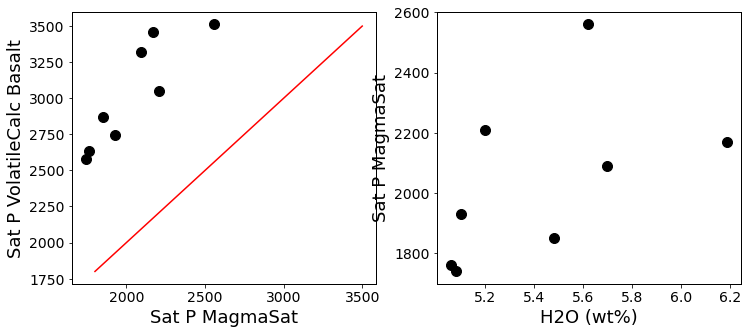

In [23]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(Sat_P_MagmaSat['SaturationP_bars_VESIcal'], Sat_P_Dixon['SaturationP_bars_VESIcal'], 'ok')
ax1.plot([1800, 3500], [1800, 3500], '-r')
ax1.set_xlabel('Sat P MagmaSat')
ax1.set_ylabel('Sat P VolatileCalc Basalt')

ax2.plot(Sat_P_MagmaSat['H2O'], Sat_P_MagmaSat['SaturationP_bars_VESIcal'], 'ok')
ax2.set_ylabel('Sat P MagmaSat')
ax2.set_xlabel('H2O (wt%)')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


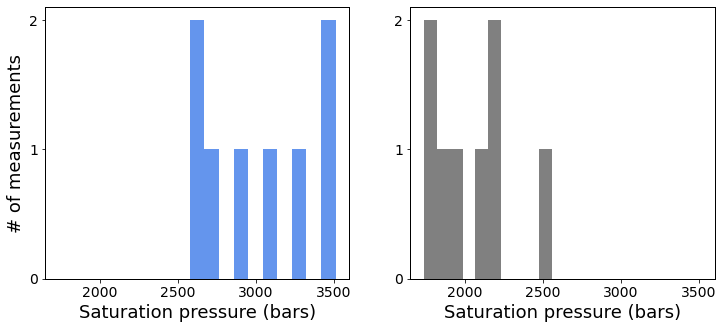

In [24]:
# Plotting as histograms (obviously this is a very small dataset, but that is to allow fast computation in this example!)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5), sharex=True)
ax1.hist(Sat_P_Dixon['SaturationP_bars_VESIcal'], color='cornflowerblue')
ax2.hist(Sat_P_MagmaSat['SaturationP_bars_VESIcal'], color='grey')
ax1.set_xlabel('Saturation pressure (bars)')
ax2.set_xlabel('Saturation pressure (bars)')
ax1.set_ylabel('# of measurements')
ax1.locator_params(axis="both", integer=True, tight=True)
ax2.locator_params(axis="both", integer=True, tight=True)

fig.savefig('Andesitic_MIs_Histogram.svg', transparent=True)

In [25]:
# Save calculations to excel for future reference
myfile.save_excel(filename = 'Andesite_MI_SatPs.xlsx', calculations=[Sat_P_MagmaSat, Sat_P_Dixon], sheet_names=['Magmasat', 'Dixon'])

Saved Andesite_MI_SatPs.xlsx


In [ ]:
# Or just save a single set of calculations using Pandas
Sat_P_IaconoMarziano.to_excel('SatP_IaconoMarziano.xlsx')